In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1494.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1350.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1453.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1110.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1351.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1407.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1394.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1016.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1428.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1366.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1308.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1247.jpg
/kag

In [2]:
#視覺化中間層convnet的輸出(中間啟動函數的輸出)
#顯示convnet個卷積層和池化層輸出的特徵圖
#層的輸出稱為activation，指啟動函數activation function的輸出
from tensorflow import keras
from tensorflow.keras.models import load_model

In [3]:
model = load_model('../input/cats-and-dogs-small-model/cats_and_dogs_small.h5')
model.summary()

2022-08-21 14:04:10.193514: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [4]:
#preprocessing
from tensorflow.keras.preprocessing import image

image_path = '../input/cats-and-dogs-small/cats_and_dogs_small/test/cats/cat.1700.jpg'

img = image.load_img(image_path, target_size=(150,150))

#將圖片預處理成4D張量，並將pixel值限制在0~1之間
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #增加第0軸(批次軸)
img_tensor = img_tensor / 255.

print(img_tensor.shape)

(1, 150, 150, 3)


In [5]:
#顯示測試影像
import matplotlib.pyplot as plt

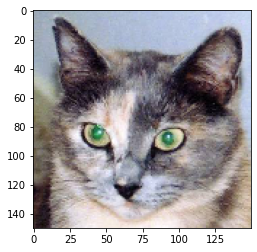

In [6]:
plt.imshow(img_tensor[0])
plt.show()

In [7]:
from tensorflow.keras import models

In [8]:
layer_outputs = [layer.output for layer in model.layers[:8]] #萃取model前8層的輸出張量
for op in layer_outputs:
    print(op)
    
#在給定輸入張量的情形下(原model的輸入張量)，建立會產生這些輸出的model
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
#Model類別與Sequential類別不同之處在於建立之模型可以有多個輸出

KerasTensor(type_spec=TensorSpec(shape=(None, 148, 148, 32), dtype=tf.float32, name=None), name='conv2d_8/Relu:0', description="created by layer 'conv2d_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 74, 74, 32), dtype=tf.float32, name=None), name='max_pooling2d_8/MaxPool:0', description="created by layer 'max_pooling2d_8'")
KerasTensor(type_spec=TensorSpec(shape=(None, 72, 72, 64), dtype=tf.float32, name=None), name='conv2d_9/Relu:0', description="created by layer 'conv2d_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 36, 36, 64), dtype=tf.float32, name=None), name='max_pooling2d_9/MaxPool:0', description="created by layer 'max_pooling2d_9'")
KerasTensor(type_spec=TensorSpec(shape=(None, 34, 34, 128), dtype=tf.float32, name=None), name='conv2d_10/Relu:0', description="created by layer 'conv2d_10'")
KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 128), dtype=tf.float32, name=None), name='max_pooling2d_10/MaxPool:0', description="created by layer 'max_pooling2d_10'")
Keras

In [9]:
#傳回一個含8個輸出張量的list，也就是8個layer的啟動函數輸出值(張量)
activations = activation_model.predict(img_tensor)

print(len(activations))

2022-08-21 14:04:11.859406: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


8


In [10]:
#第一個卷積層的啟動函數輸出張量
first_layer_activation = activations[0]

print(first_layer_activation.shape)

(1, 148, 148, 32)


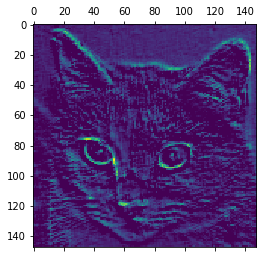

In [11]:
#視覺化第4個channel的響應圖
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis') #紫 - 綠 - 黃，顏色越趨近綠黃色，表示數值越高，也就是被激活了
#可看出第4個channel似乎被編碼成邊緣特徵偵測器

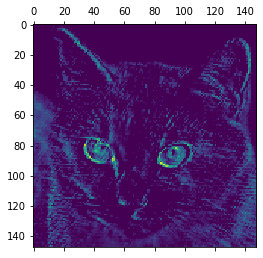

In [12]:
#視覺化第6個channel的響應圖
plt.matshow(first_layer_activation[0,:,:,6], cmap='viridis')
#可看出第6個channel似乎用來編碼貓眼特徵

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


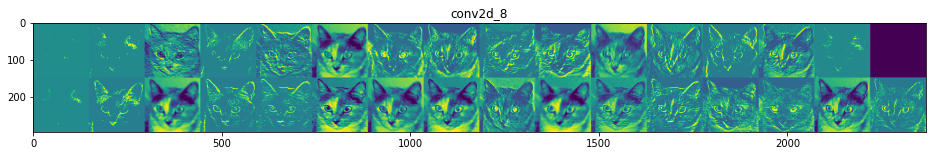

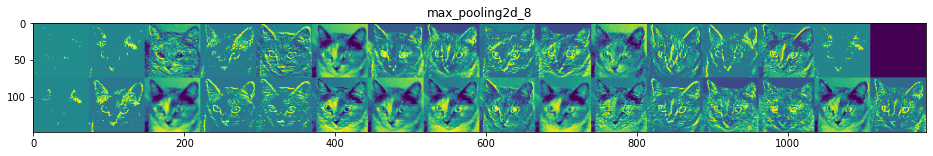

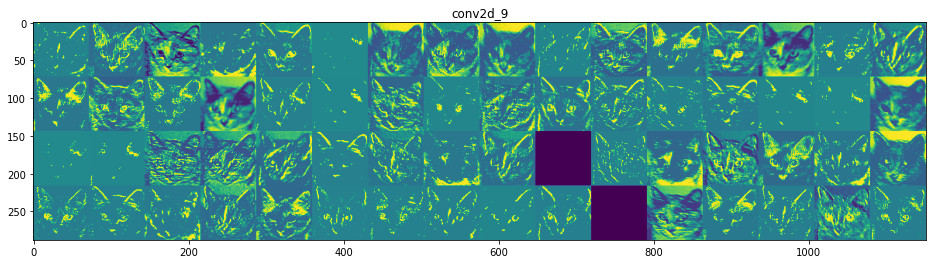

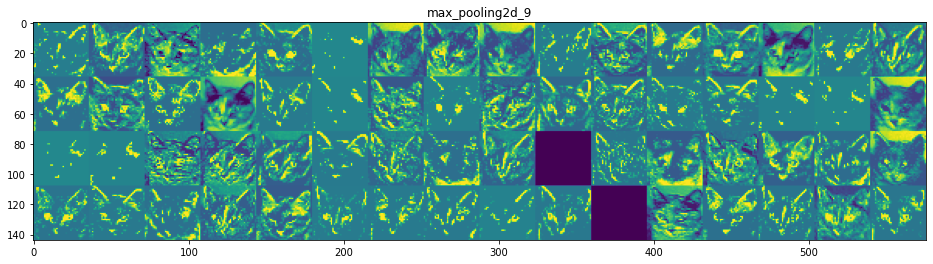

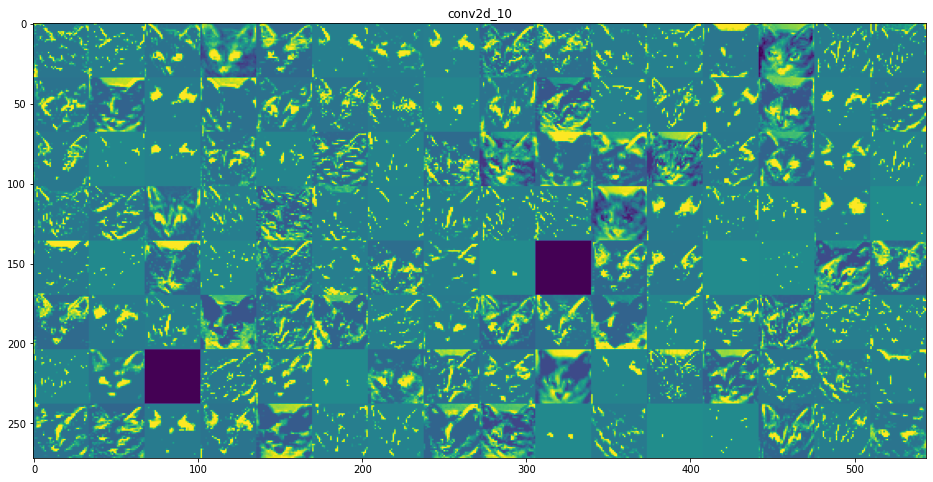

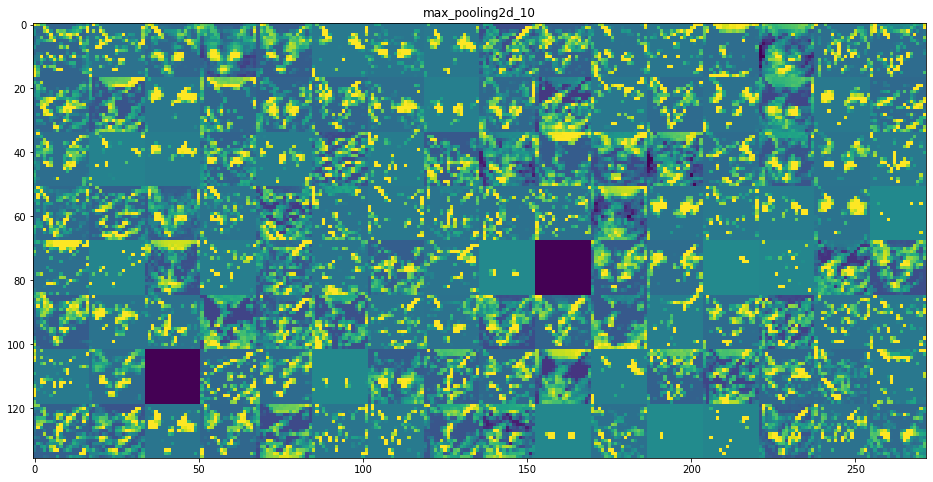

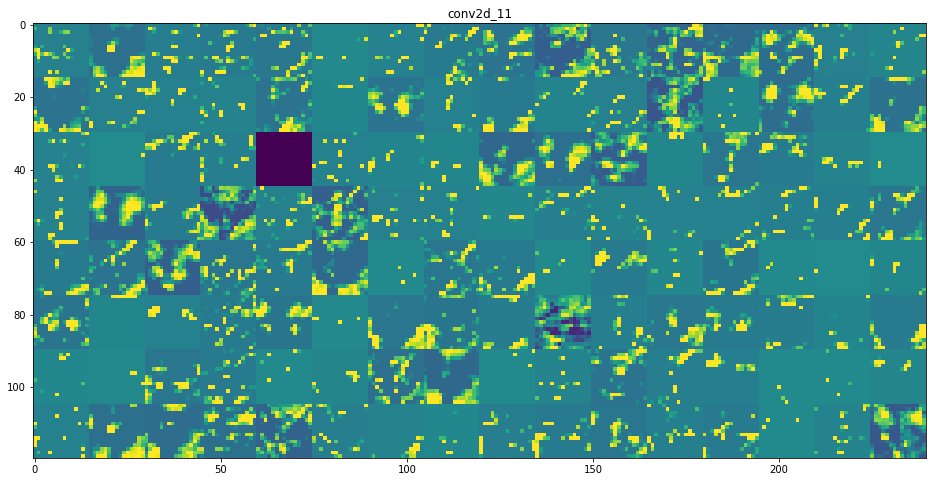

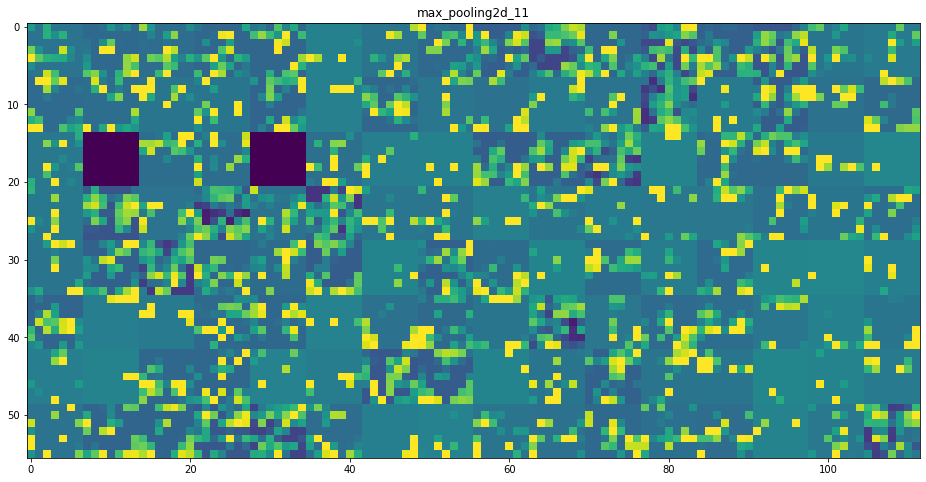

In [13]:
#視覺化每個啟動函數輸出的每個channel的響應圖
layer_names = []
for layer in model.layers[:8]: #取得模型前8層
    layer_names.append(layer.name) #取得前8層的名字

images_per_row = 16 #設定每一列可放16張圖

#顯示響應圖
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] #某層輸出張量shpae=(1,height,width,channels)中的特徵(圖)數量(channels)
    size = layer_activation.shape[1] #取得響應圖的尺寸大小(長寬相等)
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image #以網格顯示
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [14]:
#各層萃取的特徵隨著層的深度變得越來越抽象
#越高階的啟動函數輸出越不會帶有關於特定輸入的資訊，而是具備更多關於目標的資訊(此例是影像的類別:貓和狗)
#過濾掉不相關的資訊(某張影像中獨有的圖案)，有用的資訊就會被放大且優化(影像的類別)